In [1]:
#dependencies for the project
import gymnasium as gym
import gym_BinPack3D
from gym_BinPack3D.envs import Box, Rotate
import os

%matplotlib inline

#register the environment
gym.envs.register(
    id='BinPack3D-v1',
    entry_point='gym_BinPack3D.envs:PackingGame',
)

In [2]:
#define the environment.
#container_size: size of the container in 3D
#boxSeqGenerator: how the boxes are generated.
#enabled_rotations: which rotations are allowed for the boxes
#n_foreseeable_box: how many boxes are shown to the agent
#box_set: the set of boxes that are used in the environment. 

# env = gym.make('BinPack3D-v1', 
#                 container_size = (20, 4, 4),
#                 boxSeqGenerator='CUT-2', 
#                 enabled_rotations = [Rotate.NOOP, Rotate.XY, Rotate.XZ, Rotate.YZ],
#                 n_foreseeable_box = 3,
#                 minSideLen = 1,
#                 maxSideLen = 2,
#             )

# env.action_space, env.observation_space

In [3]:
# import gymnasium as gym
import matplotlib.animation as animation
from matplotlib import pyplot as plt
import imageio
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

# [Rotate.NOOP, Rotate.XY, Rotate.XZ, Rotate.YZ],

env = gym.make('BinPack3D-v1', 
                container_size = (10, 5, 5),
                boxSeqGenerator='random', 
                box_set = [Box(2,1,1), Box(1,1,1)],
                # boxSeqGenerator='CUT-2', 
                enabled_rotations = [Rotate.NOOP, Rotate.XY],
                n_foreseeable_box = 3,
                # minSideLen = 2,
                # maxSideLen = 5,
            )

vec_env = DummyVecEnv([lambda: env])
model = PPO("MultiInputPolicy", vec_env, verbose=1)
model.learn(total_timesteps=1000000)

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

#save the model
model.save(r'C:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\models\ppo_model\ppo_model_6_1.zip')



using random box sequence
Box to be sampled:
Box: Size 2 1 1 Position 0 0 0
Box: Size 1 1 1 Position 0 0 0
Using cpu device


c:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\.venv\lib\site-packages\gymnasium\utils\passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: int32
  logger.warn(
c:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\.venv\lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\.venv\lib\site-packages\gymnasium\utils\passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: int32
  logger.warn(
c:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\.venv\lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN

-----------------------------
| time/              |      |
|    fps             | 372  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 319         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011880074 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.6        |
|    explained_variance   | -0.000576   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.73e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0265     |
|    value_loss           | 3.59e+03    |
-----------------------------------------
----------------------------------

c:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\.venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:961.59 +/- 110.99


In [4]:
#load the PPO model
model = PPO.load(r"C:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\models\ppo_model\ppo_model_6_1.zip", env=vec_env)

# vec_env = model.get_env()
# obs = vec_env.reset()


frames = []
info_record= []
obs = model.env.reset()
# frame = vec_env.render("rgb_array")
frame = model.env.render(mode="rgb_array")

steps = 0
for i in range(60):
    frames.append(frame)
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    info_record.append(info)
    steps += 1
    if done:
        print("Done in ", steps, " steps")
        break
    frame = model.env.render(mode="rgb_array")
    if frame is None:
        print("Frame is None!!")
    # VecEnv resets automatically
    # if done:
    #   obs = vec_env.reset()
imageio.mimsave(r"C:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\models\ppo_model\ppo6_1.gif", frames)



c:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\.venv\lib\site-packages\gymnasium\utils\passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
C:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\gym_BinPack3D\envs\BinPack3DEnv.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


In [5]:
# Draw graph of space_usage over counter
space_usage = []
box_count = []
for info in info_record:
    space_usage.append(info[0]['space_usage'])
    box_count.append(info[0]['counter'])


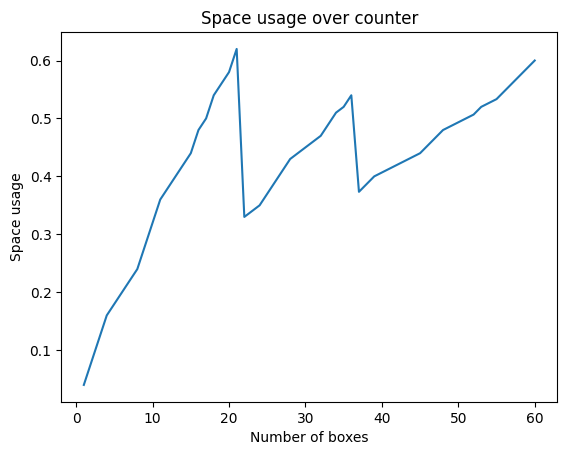

In [9]:
# Draw graph of space_usage over counter
plt.plot(box_count, space_usage)
plt.xlabel('Number of boxes')
plt.ylabel('Space usage')
plt.title('Space usage over counter')
plt.show()

In [7]:
# #train agent using stable baselines3 A2C
# from stable_baselines3 import A2C
# # import gymnasium as gym
# import matplotlib.animation as animation
# from matplotlib import pyplot as plt
# import imageio
# import numpy as np

# from stable_baselines3 import PPO
# from stable_baselines3.common.vec_env import DummyVecEnv
# from stable_baselines3.common.env_util import make_vec_env
# from stable_baselines3.common.evaluation import evaluate_policy

# DATA_DIR = r"C:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\models\a2c_model"

# env = gym.make('BinPack3D-v1', 
#                 container_size = (10, 5, 5),
#                 boxSeqGenerator='random', 
#                 enabled_rotations = [Rotate.NOOP, Rotate.XY, Rotate.XZ, Rotate.YZ],
#                 n_foreseeable_box = 3,
#                 minSideLen = 1,
#                 maxSideLen = 2,
#             )

# vec_env = DummyVecEnv([lambda: env])
# model = A2C("MultiInputPolicy", vec_env, verbose=1)
# model.learn(total_timesteps=500000)

# #save the model
# model.save(DATA_DIR)

In [8]:
# #load the A2C model
# model = A2C.load(r'C:\Users\lkxv3\OneDrive\Desktop\CS5446\project\gym-BinPack3D-master\models\a2c_model.zip', env=vec_env)

# frames = []
# info_record= []
# obs = model.env.reset()
# frame = model.env.render(mode="rgb_array")

# for i in range(10000):
#     frames.append(frame)
#     action, _state = model.predict(obs, deterministic=True)
#     obs, reward, done, info = vec_env.step(action)
#     frame = model.env.render(mode="rgb_array")
#     if frame is None:
#         print("Frame is None!!")
#         break

# imageio.mimsave("a2c_4_1.gif", frames)

# # Draw graph of space_usage over counter
# space_usage = []
# box_count = []
# for info in info_record:
#     space_usage.append(info['space_usage'])
#     box_count.append(info['counter'])

# # Draw graph of space_usage over counter
# plt.plot(box_count, space_usage)
# plt.xlabel('Number of boxes')
# plt.ylabel('Space usage')
# plt.title('Space usage over counter')
# plt.show()